# 3 Classificação

## 3.2) O aumento do PIB, o crescimento populacional e a quantidade de usuários de internet influencia no taxa de desemprego?

### Instalando e importando as bibliotecas utlizadas nesse notebook.

In [1]:
!pip3 install pandas
!pip3 install numpy
!pip3 install sklearn
!pip3 install graphviz
!pip3 install seaborn
#!apt-get install graphviz

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import graphviz

## 3.1.1) Carga e transformação da massa bruta de todos os indicadores e países.

#### Nessa etapa é carregado o dataset "massa_bruta_pais_por_indicadores.csv" (resultado do notebook "2_extracao_transformacao_massa_indicadores_todos_paises") para usar os dados de países e seus respectivos indicadores.

In [3]:
massa_bruta_pais_por_indicadores = pd.read_csv('../data/massa_bruta_pais_por_indicadores.csv')

#### Após essa carga, são selecionados as colunas dos anos de 1998 a 2013 (esse intervalo foi identificado no notebook "1_extracao_faixa_temporal_melhor_distribuicao_valores") e as linhas dos indicadores de desemprego e seus relacionados.

- 'SL.UEM.TOTL.ZS': taxa de desemprego.
- 'NY.GDP.MKTP.CD': Produto Interno Bruto em dólares (US$).
- 'SP.POP.GROW': taxa de crescimento populacional.
- 'IT.NET.USER.P2': quantidade de usuário de internet por 100 pessoas.

In [4]:
anos = ['1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', 
        '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']

indicadores = ['SL.UEM.TOTL.ZS', 'NY.GDP.MKTP.CD', 'SP.POP.GROW', 'IT.NET.USER.P2']

indicador_desemprego = ['SL.UEM.TOTL.ZS']

indicadores_relacionados = ['NY.GDP.MKTP.CD', 'SP.POP.GROW', 'IT.NET.USER.P2']

#### Aqui há extração dos nomes dos países (extraídos do dataset "massa_bruta_pais_por_indicadores.csv", através da filtragem de valores únicos). Em seguida, os dados desse dataset são filtrados pelos indicadores (especificados na célula acima, "indicadores").

In [5]:
paises = massa_bruta_pais_por_indicadores['Country Name'].unique()

df_massa_bruta_por_indicador = massa_bruta_pais_por_indicadores.loc[massa_bruta_pais_por_indicadores['Indicator Code'].isin(indicadores)]

colunas_transformacao = ['Pais', 'Indicador', '1998', '1999', '2000', '2001', '2002', '2003', 
                         '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012']


#### O passo abaixo processará os dados filtrados pelos indicadores de desemprego e seus relacionados para:
- Trocar o valor das linhas do indicador de educação por zero ou um (um quando houver aumento de um ano para o outro e zero não);
- Preencher o dataframe "df_resultado_transformacao" com o resultado disso;
- Substituir os valores em branco por zero;
- Ordernar "df_resultado_transformacao" pelo nome do país; e
- Ajustar os índices de "df_resultado_transformacao".

#### Os dados no dataframe "df_resultado_transformacao" estarão agrupados por país e indicadores.
#### Os valores de zero ou um nas linhas referentes ao indicador de desemprego mostram se, em cada ano, houve um aumento ou não da taxa de desemprego.

In [6]:
df_resultado_transformacao = pd.DataFrame(columns=colunas_transformacao)

for pais in paises:
    df_pais = df_massa_bruta_por_indicador.loc[df_massa_bruta_por_indicador['Country Name'] == pais]

    df_1998_a_2013 = df_pais.iloc[:, 2:18]
    df_1998_a_2013.index = range(df_1998_a_2013.shape[0])
    df_1998_a_2013 = df_1998_a_2013.fillna(0)
   
    indicador = df_pais['Indicator Code']
    indicador.index = range(indicador.shape[0])
    
    for index, indicador in indicador.items():
        
        if indicador in indicador_desemprego:
            valor_1998_1999 = 1 if df_1998_a_2013['1999'].iloc[index] - df_1998_a_2013['1998'].iloc[index] > 0 else 0
            valor_1999_2000 = 1 if df_1998_a_2013['2000'].iloc[index] - df_1998_a_2013['1999'].iloc[index] > 0 else 0
            valor_2000_2001 = 1 if df_1998_a_2013['2001'].iloc[index] - df_1998_a_2013['2000'].iloc[index] > 0 else 0
            valor_2001_2002 = 1 if df_1998_a_2013['2002'].iloc[index] - df_1998_a_2013['2001'].iloc[index] > 0 else 0
            valor_2002_2003 = 1 if df_1998_a_2013['2003'].iloc[index] - df_1998_a_2013['2002'].iloc[index] > 0 else 0
            valor_2003_2004 = 1 if df_1998_a_2013['2004'].iloc[index] - df_1998_a_2013['2003'].iloc[index] > 0 else 0
            valor_2004_2005 = 1 if df_1998_a_2013['2005'].iloc[index] - df_1998_a_2013['2004'].iloc[index] > 0 else 0
            valor_2005_2006 = 1 if df_1998_a_2013['2006'].iloc[index] - df_1998_a_2013['2005'].iloc[index] > 0 else 0
            valor_2006_2007 = 1 if df_1998_a_2013['2007'].iloc[index] - df_1998_a_2013['2006'].iloc[index] > 0 else 0
            valor_2007_2008 = 1 if df_1998_a_2013['2008'].iloc[index] - df_1998_a_2013['2007'].iloc[index] > 0 else 0
            valor_2008_2009 = 1 if df_1998_a_2013['2009'].iloc[index] - df_1998_a_2013['2008'].iloc[index] > 0 else 0
            valor_2009_2010 = 1 if df_1998_a_2013['2010'].iloc[index] - df_1998_a_2013['2009'].iloc[index] > 0 else 0
            valor_2010_2011 = 1 if df_1998_a_2013['2011'].iloc[index] - df_1998_a_2013['2010'].iloc[index] > 0 else 0
            valor_2011_2012 = 1 if df_1998_a_2013['2012'].iloc[index] - df_1998_a_2013['2011'].iloc[index] > 0 else 0
            valor_2012_2013 = 1 if df_1998_a_2013['2013'].iloc[index] - df_1998_a_2013['2012'].iloc[index] > 0 else 0

            valores = [pais, indicador, valor_1998_1999, valor_1999_2000, valor_2000_2001, valor_2001_2002, 
                       valor_2002_2003, valor_2003_2004, valor_2004_2005, valor_2005_2006, valor_2006_2007, 
                       valor_2007_2008, valor_2008_2009, valor_2009_2010, valor_2010_2011, valor_2011_2012,
                       valor_2012_2013]

            df_auxiliar = pd.DataFrame([valores], columns=colunas_transformacao)
            df_auxiliar.index = range(df_auxiliar.shape[0])
            df_resultado_transformacao = pd.concat([df_auxiliar, df_resultado_transformacao])

        elif indicador in indicadores_relacionados:
            valores = [pais, indicador]
            valores.extend(df_1998_a_2013.drop(columns=['2013']).iloc[index].values.tolist())
            df_auxiliar = pd.DataFrame([valores], columns=colunas_transformacao)
            df_auxiliar.index = range(df_auxiliar.shape[0])
            df_resultado_transformacao = pd.concat([df_auxiliar, df_resultado_transformacao])

            
df_resultado_transformacao = df_resultado_transformacao.sort_values(['Pais'], ascending=[True])
df_resultado_transformacao.index = range(df_resultado_transformacao.shape[0])
df_resultado_transformacao.head(6)

,Pais,Indicador,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Afghanistan,NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,2.461666e+09,4.128821e+09,4.583644e+09,5.285466e+09,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10
1,Afghanistan,SL.UEM.TOTL.ZS,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
2,Afghanistan,IT.NET.USER.P2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e-02,1.100000e-01,1.220000e+00,2.110000e+00,1.900000e+00,1.840000e+00,3.550000e+00,4.000000e+00,5.000000e+00,5.450000e+00
3,Afghanistan,SP.POP.GROW,2.590000e+00,2.820000e+00,3.490000e+00,4.250000e+00,4.720000e+00,4.820000e+00,4.470000e+00,3.870000e+00,3.230000e+00,2.760000e+00,2.510000e+00,2.570000e+00,2.810000e+00,3.100000e+00,3.270000e+00
4,Albania,SL.UEM.TOTL.ZS,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
5,Albania,NY.GDP.MKTP.CD,2.707124e+09,3.414761e+09,3.632044e+09,4.060759e+09,4.435079e+09,5.746946e+09,7.314865e+09,8.158549e+09,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10


#### Transforma todos os dados dos indicadores em colunas. Isso será útil para as etapas de análise e classificação. Também renomeia as colunas para facilitar o entendimento.

In [7]:
df_desemprego_relacionados = pd.DataFrame()

for indicador in indicadores:
    df_indicador = df_resultado_transformacao.loc[df_resultado_transformacao['Indicador'] == indicador]
    df_indicador.index = range(df_indicador.shape[0])
    df_periodos_indicador = df_indicador.drop(['Pais', 'Indicador'], axis=1)    
    df_periodos_indicador = df_periodos_indicador.stack()
    df_periodos_indicador.index = range(df_periodos_indicador.shape[0])
    df_desemprego_relacionados[indicador] = df_periodos_indicador.tolist()

nomes_colunas = {'SL.UEM.TOTL.ZS': 'Desemprego', 
                 'NY.GDP.MKTP.CD': 'PIB',
                 'SP.POP.GROW': 'Crescimento Populacional',
                 'IT.NET.USER.P2': 'Usuários Internet'}

df_desemprego_relacionados = df_desemprego_relacionados.rename(columns = nomes_colunas)
df_desemprego_relacionados.head()

,Desemprego,PIB,Crescimento Populacional,Usuários Internet
0,0.0,0.000000e+00,2.59,0.0
1,0.0,0.000000e+00,2.82,0.0
2,1.0,0.000000e+00,3.49,0.0
3,1.0,2.461666e+09,4.25,0.0
4,1.0,4.128821e+09,4.72,0.0


#### Antes de começar a etapa de classificação, verifica-se se a coluna "Desemprego" possui alta taxa de preenchimento ou boa distribuição de valores.

In [8]:
## Extrai os dados originais da coluna referente ao indicador de desemprego. ##

df_analise_desemprego = pd.DataFrame(columns=colunas_transformacao)

for pais in paises:
    df_pais = df_massa_bruta_por_indicador.loc[df_massa_bruta_por_indicador['Country Name'] == pais]

    df_1998_a_2013 = df_pais.iloc[:, 2:18]
    df_1998_a_2013.index = range(df_1998_a_2013.shape[0])
    df_1998_a_2013 = df_1998_a_2013.fillna(0)
   
    indicador = df_pais['Indicator Code']
    indicador.index = range(indicador.shape[0])
    
    for index, indicador in indicador.items():        
        if indicador in indicador_desemprego:
            valores = [pais, indicador]
            valores.extend(df_1998_a_2013.drop(columns=['2013']).iloc[index].values.tolist())
            df_auxiliar = pd.DataFrame([valores], columns=colunas_transformacao)
            df_auxiliar.index = range(df_auxiliar.shape[0])
            df_analise_desemprego = pd.concat([df_auxiliar, df_analise_desemprego])
            
df_analise_desemprego = df_analise_desemprego.sort_values(['Pais'], ascending=[True])
df_analise_desemprego.index = range(df_analise_desemprego.shape[0])
## Fim da extração ##


# Agora os dados da coluna de desemprego de todos os países para os anos de 1998 a 2012 
# serão empilhados em uma única coluna.
df_1998_a_2013 = df_analise_desemprego.iloc[:, 2:18]
df_1998_a_2013.index = range(df_1998_a_2013.shape[0])
df_periodos_indicador = df_1998_a_2013.stack()
df_periodos_indicador.index = range(df_periodos_indicador.shape[0])
df_analise_tx_desemp = pd.DataFrame()
df_analise_tx_desemp['Desemprego'] = df_periodos_indicador.tolist()


# Os dados originais de desemprego são descritos e é contada a quantidade valores não preenchidos.
qtd_zeros = df_analise_tx_desemp['Desemprego'].isin(['0']).mean()*100
print("Quantidade de valores não preenchidos para a coluna de desemprego anos: %.2f%%" % qtd_zeros)

# Ao realizar uma descrição dos dados de desemprego percebe-se que há uma
# grande incidência de campos com valor igual a zero.

Quantidade de valores não preenchidos para a coluna de desemprego anos: 14.29%


#### Remove as linhas cujos valores não foram preenchidos, ou seja, toda linha com os valores zerados para todos os indicadores serão excluídas.

In [9]:
df_desemprego_relacionados = df_desemprego_relacionados.loc[(df_desemprego_relacionados!=0).any(1)]
df_desemprego_relacionados.index = range(df_desemprego_relacionados.shape[0])

df_desemprego_relacionados.describe()

,Desemprego,PIB,Crescimento Populacional,Usuários Internet
count,3223.00000,3.223000e+03,3223.000000,3223.000000
mean,0.32175,2.282529e+11,1.463453,19.821132
std,0.46722,1.042335e+12,1.594697,24.473127
min,0.00000,0.000000e+00,-10.960000,0.000000
25%,0.00000,1.915288e+09,0.490000,1.000000
50%,0.00000,1.036881e+10,1.300000,7.490000
75%,1.00000,7.575417e+10,2.350000,32.755000
max,1.00000,1.615526e+13,16.330000,96.210000


Ao analisar a descrição acima, percebe-se que esse dataset selecionado para relacionar alguns indicadores socioeconômicos com o desemprego de pessoas possui grandes diferenças na distribuição de valores.

#### A função "classificar" objetiva analisar o resultado de um modelo de classificação. Além disso, imprime interpretações das previsões.

In [10]:
def classificar(modelo, treino_x, teste_x, treino_y, teste_y, nome_modelo):
    modelo.fit(treino_x, treino_y)
    print("*********  " + nome_modelo + "  *********")
    print("Acurácia treinamento: %.2f%%" % (modelo.score(treino_x, treino_y)*100))
    previsoes = modelo.predict(teste_x)
    print("Acurácia previsão: %.2f%%" % (accuracy_score(teste_y, previsoes)*100))
    print("")
    print("<< Matriz de confusão >>")
    matriz_confusao = confusion_matrix(teste_y, previsoes)
    print(pd.crosstab(teste_y, previsoes, rownames=['Real'], colnames=['Predito'], margins=True))
    print("")
    print("<< Relatório de classificação >>")
    print(classification_report(teste_y, previsoes))

#### Aplicação do "Dummy Classifier" e sua respectiva acurácia.

In [11]:
x = df_desemprego_relacionados[['PIB', 'Crescimento Populacional', 'Usuários Internet']]
y = df_desemprego_relacionados['Desemprego']

#Define a ordem dos números aleatórios e tetira a aleatoriedade da separação dos dados de treino e teste.
SEED = 5
np.random.seed(SEED)

treino_x_bruto_dm, teste_x_bruto_dm, treino_y_dm, teste_y_dm = train_test_split(x, y, random_state = SEED, test_size=0.25, stratify=y)
#O parâmetro "stratify=y" orienta o algoritmo a estratificar (separar proporcionalmente) os dados de acordo com o "y".

classificar(DummyClassifier(strategy='stratified'), treino_x_bruto_dm, teste_x_bruto_dm, treino_y_dm, teste_y_dm, "Dummy")

*********  Dummy  *********
Acurácia treinamento: 57.59%
Acurácia previsão: 55.96%

<< Matriz de confusão >>
Predito  0.0  1.0  All
Real                  
0.0      377  170  547
1.0      185   74  259
All      562  244  806

<< Relatório de classificação >>
              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68       547
         1.0       0.30      0.29      0.29       259

    accuracy                           0.56       806
   macro avg       0.49      0.49      0.49       806
weighted avg       0.55      0.56      0.56       806



#### Aplicação do "SVC" e sua acurácia.

In [12]:
# Utilização do modelo "SVC"

x = df_desemprego_relacionados[['PIB', 'Crescimento Populacional', 'Usuários Internet']]
y = df_desemprego_relacionados['Desemprego']

#Define a ordem dos números aleatórios e retira a aleatoriedade da separação dos dados de treino e teste.
SEED = 5
np.random.seed(SEED)

treino_x_bruto_svc, teste_x_bruto_svc, treino_y_svc, teste_y_svc = train_test_split(x, y, random_state = SEED, test_size=0.25, stratify=y)
#O parâmetro "stratify=y" orienta o algoritmo a estratificar (separar proporcionalmente) os dados de acordo com o "y".

#Reescalando os dados para uma faixa similar a todos.
scaler = StandardScaler()
scaler.fit(treino_x_bruto_svc)
treino_x = scaler.transform(treino_x_bruto_svc)
teste_x = scaler.transform(teste_x_bruto_svc)

classificar(SVC(), treino_x_bruto_svc, teste_x_bruto_svc, treino_y_svc, teste_y_svc, "SVC")

*********  SVC  *********
Acurácia treinamento: 68.02%
Acurácia previsão: 67.74%

<< Matriz de confusão >>
Predito  0.0  1.0  All
Real                  
0.0      545    2  547
1.0      258    1  259
All      803    3  806

<< Relatório de classificação >>
              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81       547
         1.0       0.33      0.00      0.01       259

    accuracy                           0.68       806
   macro avg       0.51      0.50      0.41       806
weighted avg       0.57      0.68      0.55       806



#### Aplicação do "Gaussian Naive Bayes" e sua respectiva acurácia.

In [13]:
x = df_desemprego_relacionados[['PIB', 'Crescimento Populacional', 'Usuários Internet']]
y = df_desemprego_relacionados['Desemprego']

#Define a ordem dos números aleatórios e tetira a aleatoriedade da separação dos dados de treino e teste.
SEED = 20
np.random.seed(SEED)

treino_x_bruto_nb, teste_x_bruto_nb, treino_y_nb, teste_y_nb = train_test_split(x, y, random_state = SEED, test_size=0.25, stratify=y)
#O parâmetro "stratify=y" orienta o algoritmo a estratificar (separar proporcionalmente) os dados de acordo com o "y".

classificar(GaussianNB(), treino_x_bruto_nb, teste_x_bruto_nb, treino_y_nb, teste_y_nb, "Gaussian Naive Bayes")

*********  Gaussian Naive Bayes  *********
Acurácia treinamento: 67.36%
Acurácia previsão: 67.74%

<< Matriz de confusão >>
Predito  0.0  1.0  All
Real                  
0.0      541    6  547
1.0      254    5  259
All      795   11  806

<< Relatório de classificação >>
              precision    recall  f1-score   support

         0.0       0.68      0.99      0.81       547
         1.0       0.45      0.02      0.04       259

    accuracy                           0.68       806
   macro avg       0.57      0.50      0.42       806
weighted avg       0.61      0.68      0.56       806



#### Aplicação do "Decision Tree Classifier" e sua respectiva acurácia. Além disso, é exibido um gráfico para a análise das decisões tomadas pelo algoritmo.

*********  DecisionTreeClassifier  *********
Acurácia treinamento: 68.43%
Acurácia previsão: 65.38%

<< Matriz de confusão >>
Predito  0.0  1.0  All
Real                  
0.0      493   54  547
1.0      225   34  259
All      718   88  806

<< Relatório de classificação >>
              precision    recall  f1-score   support

         0.0       0.69      0.90      0.78       547
         1.0       0.39      0.13      0.20       259

    accuracy                           0.65       806
   macro avg       0.54      0.52      0.49       806
weighted avg       0.59      0.65      0.59       806



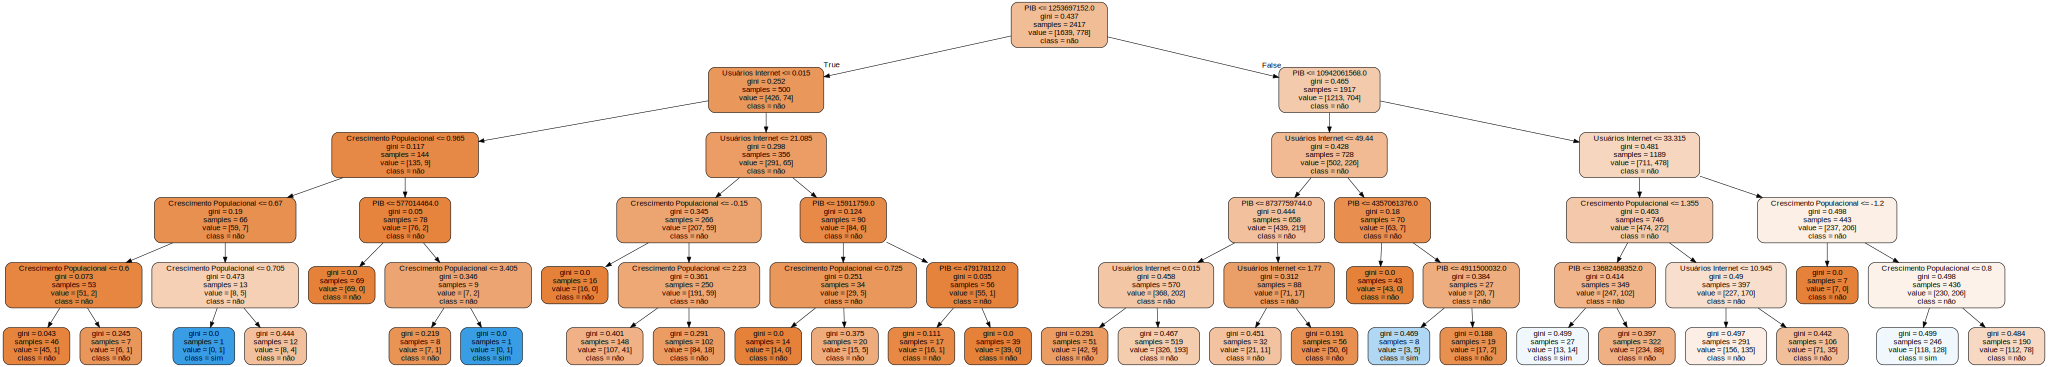

In [14]:
x = df_desemprego_relacionados[['PIB', 'Crescimento Populacional', 'Usuários Internet']]
y = df_desemprego_relacionados['Desemprego']

#Define a ordem dos números aleatórios e tetira a aleatoriedade da separação dos dados de treino e teste.
SEED = 20
np.random.seed(SEED)

treino_x_bruto_dtc, teste_x_bruto_dtc, treino_y_dtc, teste_y_dtc = train_test_split(x, y, random_state = SEED, test_size=0.25, stratify=y)
#O parâmetro "stratify=y" orienta o algoritmo a estratificar (separar proporcionalmente) os dados de acordo com o "y".

modelo = DecisionTreeClassifier(max_depth=5)

classificar(DecisionTreeClassifier(max_depth=5), treino_x_bruto_dtc, teste_x_bruto_dtc, treino_y_dtc, teste_y_dtc, "DecisionTreeClassifier")

modelo.fit(treino_x_bruto_dtc, treino_y_dtc)
previsoes = modelo.predict(teste_x_bruto_dtc)
acuracia = accuracy_score(teste_y_dtc, previsoes)
features = x.columns
dados_dot = export_graphviz(modelo, feature_names=features, rounded=True, filled=True, class_names=['não', 'sim'])
imagem = graphviz.Source(dados_dot)
imagem

#### Essa lógica calcula qual a média de zeros do indicador de desemprego "NY.GDP.MKTP.CD" (coluna a ser usada na classificação binária).

In [15]:
df = df_massa_bruta_por_indicador.loc[df_massa_bruta_por_indicador['Indicator Code'] == 'NY.GDP.MKTP.CD']
df.index = range(df.shape[0])
df = df.iloc[:, 2:18]
print("A média de valores não preenchidos (que receberão o valor zero) é de %.2f%%" % (df.isna().mean().mean() * 100))

A média de valores não preenchidos (que receberão o valor zero) é de 7.26%
